In [1]:
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

# Cournot Competition

One model of understanding oligopolies comes in **Cournot competition**, a model describing a market in which firms compete by changing their output first proposed by Antoine Augustin Cournot. In Cournot competition, there are a fixed number of firms in a market that produce the same product. Firms do not collude and have _market power_ (i.e. each firm's output decisions affect the price of the good). Each firm knows the number of firms in the market and has its own cost function that it uses to determine its level of output.

OPEC is a good example of a Cournot oligopoly: its participants affect prices by changing their output. OPEC also demonstrates a flaw in the reasoning behind Cournot competition: the equilibrium state of a Cournot oligoply suggests that collusion by market participants is the rational policy, but in reality game theory shows us this cannot be the "true" equilibrium because cartel members undercut one another in a bid for market share.

## Cournot Equilibrium

To find the equilibrium state of a Cournot duopoly, let $c$ be the (constant) marginal cost of both firms (i.e. each additional good costs the same amount to produce regardless of the number currently being produced), $p_1$ and $p_2$ be the prices of firms 1 and 2, resp., and $q_1$ and $q_2$ their quantities. Let $P$ be the price function for a given level of production. We know that the equilibrium price is $p_1 = p_2 = P(q_1 + q_2)$, and therefore firm 1's profit is $q_1(P(q_1 + q_2) - c)$ (since $c$ is constant).

The first step is to calculate firm 1's residual demand. If firm 1 believes that firm 2 is going to produce $q_2$ units of output, we can draw a **residual demand curve** for firm 1. If firm 1 decides to produce 0 units of output, then the price of the good is $P(0 + q_2) = P(q_2)$. If they produce $q_1$ units, it's $P(q_1 + q_2)$. Using this information, we can draw the residual demand curve. This curve will be called $d_1$.

Now we need to determine firm 1's optimal output, which occurs where the **marginal revenue** (the additional revenue gained by increasing production by one unit) intersects the marginal cost $c$. Because we hold $c$ constant, the marginal revenue curve is the line with twice the slope of the residual demand and the same $y$-intercept. The marginal revenue of firm 1 is denoted $r_1$.

Let $q'_1$ be the optimum output for firm 1, such that $r_1(q'_1) = c$. The graph below shows the curves and their relationships to one another.

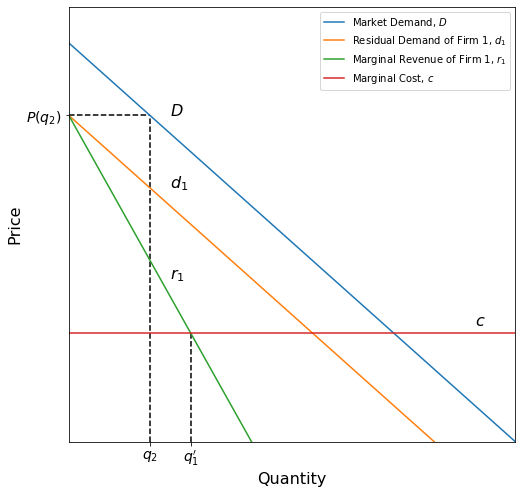

In [2]:
m, b = -0.5, 9
q_2 = 4
c = 3
D_fn = lambda x: m * x + b + 2
P = lambda x: D_fn(x + q_2)
r_1_fn = lambda x: 2 * m * x + m * q_2 + b + 2
r_1_inv = lambda x: (x - m * q_2 - b - 2) / 2 / m

q_1 = np.linspace(0, 25, 1000)
D = D_fn(q_1)
d_1 = P(q_1)
r_1 = r_1_fn(q_1)

q_1_prime = r_1_inv(c)

plt.figure(figsize=[8,8])

# demand
plt.plot(q_1, D, label=r"Market Demand, $D$")
plt.text(5, b, r"$D$", size=16)

# residual demand
plt.plot(q_1, d_1, label=r"Residual Demand of Firm 1, $d_1$")
plt.text(5, b - 2, r"$d_1$", size=16)

# marginal revenue
plt.plot(q_1, r_1, label=r"Marginal Revenue of Firm 1, $r_1$")
plt.text(5, b - 4.5, r"$r_1$", size=16)

# marginal cost
plt.plot(q_1, c * np.ones_like(q_1), label=r"Marginal Cost, $c$")
plt.text(20, 3.2, r"$c$", size=16)

# optimum quantity
plt.vlines(q_1_prime, 0, 3, linestyles="dashed")

# q2
plt.vlines(q_2, 0, D_fn(q_2), linestyles="dashed")
plt.hlines(P(0), 0, q_2, linestyles="dashed")

plt.xlim([0,22])
plt.ylim([0,12])
plt.xticks([r_1_inv(c), q_2], [r"$q^\prime_1$", r"$q_2$"], size=14)
plt.yticks([P(0)], [r"$P(q_2)$"], size=14)
plt.xlabel("Quantity", size=16)
plt.ylabel("Price", size=16)
plt.legend();

$q'_1$ is a function of $q_2$ as firm 1's optimal output depends on what it thinks firm 2 is going to produce. To find the equilibrium, we must define $q'_1$ for all possible values of $q_2$. Consider the case when $q_2=0$; then firm 1's residual demand is the same as the market demand, since $d_1$ and $D$ are separated horizontally by a difference of $q_2$. Firm 1 then produces the monopoly quantity $q_m$, since that is where its marginal revenue equals its marginal cost. If, however, firm 2 chooses to produce at a level of perfect competition, $q_c$, the optimum for firm 1 is to produce 0 output units, since their marginal revenue will intersect $c$ at $q_1 = 0$. The graph below shows both of these cases.

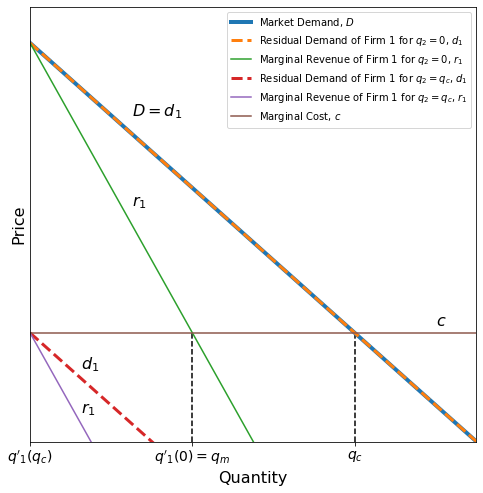

In [3]:
m, b = -0.5, 9
q_2 = 0
c = 3
D_fn = lambda x: m * x + b + 2
P = lambda x: D_fn(x + q_2)
r_1_fn = lambda x: 2 * m * x + m * q_2 + b + 2
r_1_inv = lambda x: (x - m * q_2 - b - 2) / 2 / m

q_1 = np.linspace(0, 25, 1000)
D = D_fn(q_1)
d_1 = P(q_1)
r_1 = r_1_fn(q_1)

q_1_prime = r_1_inv(c)

plt.figure(figsize=[8,8])

# demand
plt.plot(q_1, D, label=r"Market Demand, $D$", linewidth=4)
plt.text(5, b, r"$D = d_1$", size=16)

# residual demand
plt.plot(q_1, d_1, label=r"Residual Demand of Firm 1 for $q_2=0$, $d_1$", linestyle="dashed", linewidth=3)
# plt.text(5, b - 2, r"$d_1$", size=16)

# marginal revenue
plt.plot(q_1, r_1, label=r"Marginal Revenue of Firm 1 for $q_2=0$, $r_1$")
plt.text(5, b - 2.5, r"$r_1$", size=16)

# case when q_2 = q_c
m, b = -0.5, 9
q_2 = 16
c = 3
D_fn = lambda x: m * x + b + 2
P = lambda x: D_fn(x + q_2)
r_1_fn = lambda x: 2 * m * x + m * q_2 + b + 2
r_1_inv = lambda x: (x - m * q_2 - b - 2) / 2 / m

q_1 = np.linspace(0, 25, 1000)
D = D_fn(q_1)
d_1 = P(q_1)
r_1 = r_1_fn(q_1)

# residual demand
plt.plot(q_1, d_1, label=r"Residual Demand of Firm 1 for $q_2=q_c$, $d_1$", linestyle="dashed", linewidth=3)
plt.text(2.5, 2, r"$d_1$", size=16)

# marginal revenue
plt.plot(q_1, r_1, label=r"Marginal Revenue of Firm 1 for $q_2=q_c$, $r_1$")
plt.text(2.5, 0.8, r"$r_1$", size=16)

# marginal cost
plt.plot(q_1, c * np.ones_like(q_1), label=r"Marginal Cost, $c$")
plt.text(20, 3.2, r"$c$", size=16)

# q_c
plt.vlines(D_fn(-10), 0, c, linestyles="dashed")

# q'_1(0)
plt.vlines(r_1_inv(-5), 0, 3, linestyles="dashed")

plt.xlim([0,22])
plt.ylim([0,12])
plt.xticks([D_fn(-10), r_1_inv(-5), 0], [r"$q_c$", r"$q'_1(0) = q_m$", r"$q'_1(q_c)$"], size=14)
plt.yticks([], [], size=14)
plt.xlabel("Quantity", size=16)
plt.ylabel("Price", size=16)
plt.legend();

When demand is linear and marginal cost is constant, the function $q'_1$ is also linear. Because we have two points, $q'_1(0) = q_m$ and $q'_1(q_c) = 0$, we can draw the curve $q'_1$. Remember that $q'_1$ is a function of what firm 1 *thinks* firm 2 is going to produce.

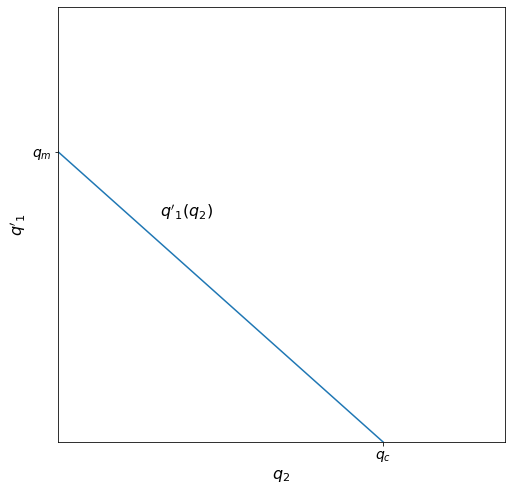

In [4]:
q_m = r_1_inv(-5)
q_c = D_fn(-10)

p1 = (0, q_m)
p2 = (q_c, 0)

slope = (p2[1] - p1[1]) / (p2[0]- p1[0])
intercept = p1[1] - slope * p1[0]

xs = np.linspace(0, 25, 1000)
ys = slope * xs + intercept

plt.figure(figsize=[8,8])

plt.plot(xs, ys, label=r"$q'_1$")
plt.text(5, intercept - 1.8, r"$q'_1(q_2)$", size=16)

plt.xlim([0,22])
plt.ylim([0,12])
plt.xticks([q_c], [r"$q_c$"], size=14)
plt.yticks([q_m], [r"$q_m$"], size=14)
plt.xlabel("$q_2$", size=16)
plt.ylabel("$q'_1$", size=16);

Finally, we need to know firm 2's reaction to firm 1's production. Because both firms have the same cost function, firm 2's optimum output $q'_2$ given firm 1's output $q_1$ is the inverse of firm 1's. The equilibrium of the model is at the intersection of these reaction functions.

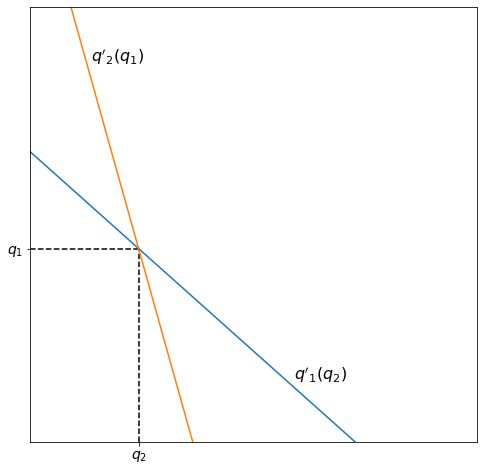

In [5]:
q_m = r_1_inv(-5)
q_c = D_fn(-10)

p1 = (0, q_m)
p2 = (q_c, 0)

slope = (p2[1] - p1[1]) / (p2[0]- p1[0])
intercept = p1[1] - slope * p1[0]

xs = np.linspace(0, 25, 1000)
ys1 = slope * xs + intercept
ys2 = (xs - intercept) / slope

plt.figure(figsize=[8,8])

plt.plot(xs, ys1, label=r"$q'_1$")
plt.plot(xs, ys2, label=r"$q'_2$")
plt.text(13, intercept - 6.3, r"$q'_1(q_2)$", size=16)
plt.text(3, intercept + 2.5, r"$q'_2(q_1)$", size=16)

x_star = - (slope + 1) * intercept / (slope**2 - 1)
y_star = slope * x_star + intercept
plt.vlines(x_star, 0, y_star, linestyle="dashed")
plt.hlines(y_star, 0, x_star, linestyle="dashed")

plt.xlim([0,22])
plt.ylim([0,12])
plt.xticks([x_star], [r"$q_2$"], size=14)
plt.yticks([y_star], [r"$q_1$"], size=14);

## Implications

The Cournot model implies that output is greater in a Cournot duopoly than in a monopoly, but still lower than perfect competition. Prices are also lower in a Cournot duopoly, but higher than perfect competition. Cournot equilibria are also a subset of Nash equilibria, and so the equilibrium we just derived is one from which neither player will likely deviate. As noted earlier, Cournot also indicates that members of a duopoly could form a cartel and raise profits by colluding.